# Per-Volume fMRI Phase

Visualize the mean gastric phase per fMRI volume using `plot_volume_phase`.
This is the core quantity used in gastric-brain coupling analyses.
Cut regions at the start and end (to remove filter transients) are
highlighted.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gastropy as gp
from gastropy.neuro.fmri import create_volume_windows, phase_per_volume

plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.facecolor"] = "white"

In [2]:
# Load fMRI-concurrent EGG
fmri = gp.load_fmri_egg(session="0001")
signal = fmri["signal"]
sfreq = fmri["sfreq"]
tr = fmri["tr"]
trigger_times = fmri["trigger_times"]

# Select best channel and process
best_idx, _, _, _ = gp.select_best_channel(signal, sfreq)
filtered, _ = gp.apply_bandpass(signal[best_idx], sfreq,
                                 low_hz=gp.NORMOGASTRIA.f_lo,
                                 high_hz=gp.NORMOGASTRIA.f_hi)
phase, analytic = gp.instantaneous_phase(filtered)

# Create volume windows and extract phase
n_volumes = len(trigger_times)
windows = create_volume_windows(trigger_times, tr, n_volumes)
vol_phase = phase_per_volume(analytic, windows)
print(f"{n_volumes} volumes, TR={tr} s")

420 volumes, TR=1.856 s


## Basic Volume Phase Plot

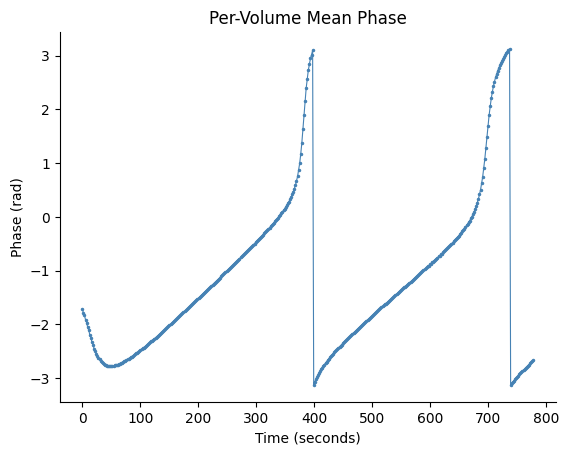

In [3]:
fig, ax = gp.plot_volume_phase(vol_phase, tr=tr)
plt.show()

## With Cut Regions

Highlight the first and last 21 volumes that would typically be
discarded to remove filter edge transients.

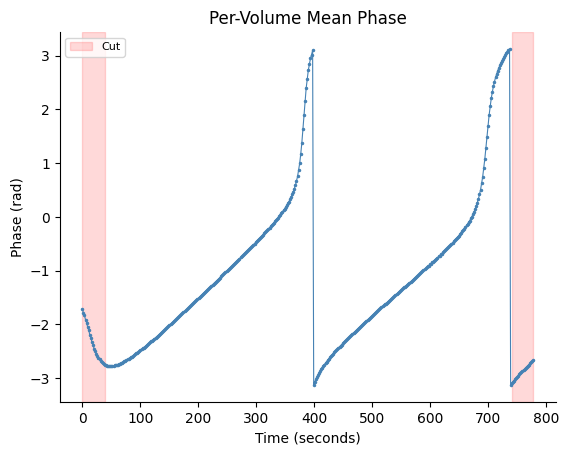

In [4]:
fig, ax = gp.plot_volume_phase(vol_phase, tr=tr, cut_start=21, cut_end=21)
plt.show()

## Volume Index X-Axis

Omit `tr` to use volume index instead of time on the x-axis.

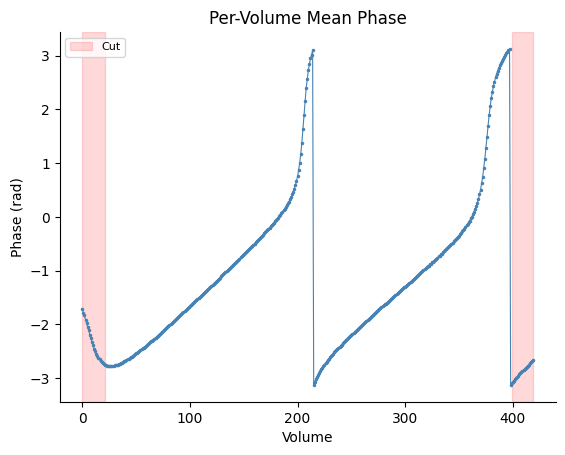

In [5]:
fig, ax = gp.plot_volume_phase(vol_phase, cut_start=21, cut_end=21)
plt.show()

**See also:** [fMRI-EGG Pipeline](fmri_egg_pipeline.ipynb),
[Comprehensive Figure](plot_egg_comprehensive.ipynb)